## 1. Data preprocessing

### 1.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

### 1.2 Importing the cleaned data

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv',sep=",")
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [3]:
# independent and dependent features for Classification problem
X=df.drop('Classes',axis=1)
y=df['Classes']

### 1.3 Search for correlated features and removing them

In [4]:
correlation=X.corr()
correlation

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000


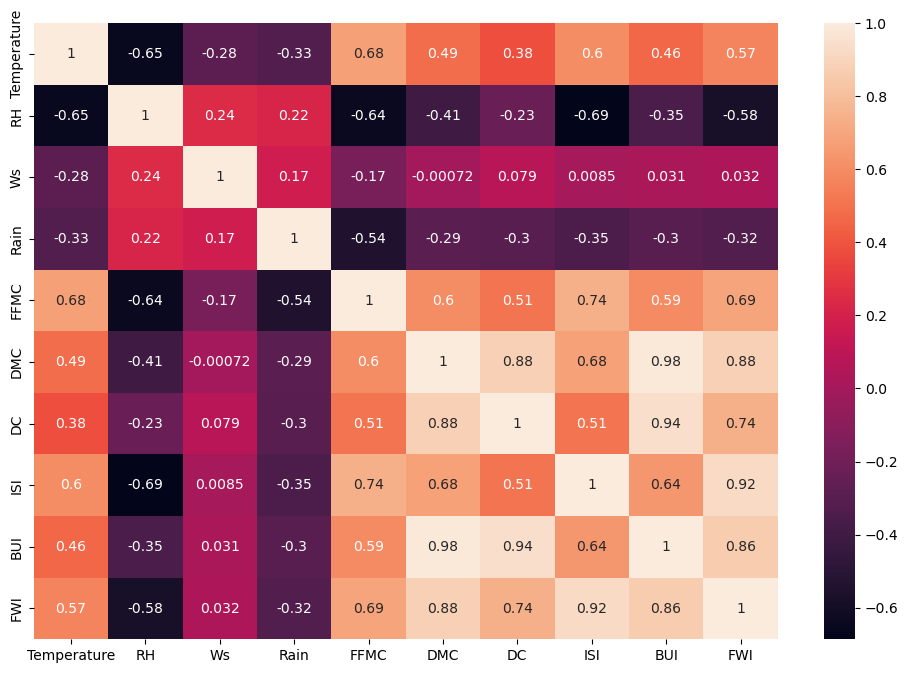

In [5]:
#Using peason correlation
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True)
plt.show()

In [6]:
def corr_fn(dataset,threshold):
    col_corr=set()
    row_corr=set()
    correlation_matrix=dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j])>threshold:
                column_name=correlation_matrix.columns[j]
                row_name=correlation_matrix.index[i]
                col_corr.add(column_name)
                row_corr.add(row_name)
    return col_corr,row_corr

In [7]:
(col_corr,row_corr)=corr_fn(X,0.95)
print('Correlated features are',col_corr,'and',row_corr)

Correlated features are {'DMC'} and {'BUI'}


In [8]:
# Dropping the features with high correlation
X.drop(col_corr,axis=1,inplace=True)

### 1.4 train-test split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### 1.4 Standard Scaler

In [10]:
def Standard_scaler(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    return X_train_scaled,X_test_scaled

In [11]:
X_train_scaled,X_test_scaled=Standard_scaler(X_train,X_test)

/tmp/ipykernel_76410/309616647.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after standardization')

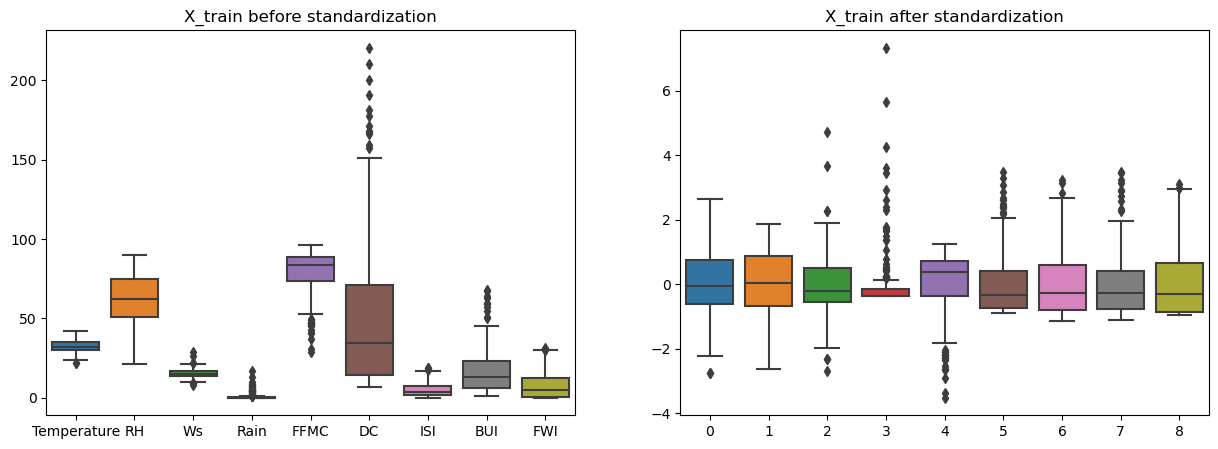

In [12]:
# Visualization the effect of standardization
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before standardization')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after standardization')

## 2. Model building 

### 2.1 Logistic classification

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

from sklearn.model_selection import GridSearchCV
params ={'C':[0.1,2,5,8,10]}
Logistic_regression=GridSearchCV(log_reg,params,scoring='accuracy',cv=5)
Logistic_regression.fit(X_train_scaled,y_train)
log_pred=Logistic_regression.predict(X_test_scaled)


In [27]:
from sklearn.metrics import accuracy_score,precision_recall_curve,f1_score,confusion_matrix,classification_report
confusion_matrix(y_test,log_pred)
print('Logistic regression \nf1 score is',f1_score(y_test,log_pred),'\naccuracy is',accuracy_score(y_test,log_pred))

Logistic regression 
f1 score is 0.9803921568627451 
accuracy is 0.9795918367346939


### 2.2 Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_clas=RandomForestClassifier()
rf_clas.fit(X_train_scaled,y_train)
rf_clas_pred=rf_clas.predict(X_test_scaled)

print('Random forest classifier \nf1 score is',f1_score(y_test,rf_clas_pred),'\naccuracy is',accuracy_score(y_test,rf_clas_pred))
cr=classification_report(y_test,rf_clas_pred)
print(cr)

Random forest classifier 
f1 score is 1.0 
accuracy is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        26

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



### Saving the best model as .pkl file

In [26]:
import pickle
pickle.dump(rf_clas_pred,open('classificationmodel.pkl','wb'))